<a href="https://colab.research.google.com/github/sheemambabu/CMPE-297-Special-Topics/blob/main/Assignment_4/Tabular_Deep_AutoVIML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing packages

In [ ]:
!pip install kaggle
!pip install deep_autoviml --upgrade

In [ ]:
! ls

sample_data


# Download Data from kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sheemamurugeshbabu","key":"8527ca80013782f3cc2549399a34b401"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d sibelius5/telco-customer-churn

  0% 0.00/2.99M [00:00<?, ?B/s]
100% 2.99M/2.99M [00:00<00:00, 93.4MB/s]


In [ ]:
! unzip telco-customer-churn.zip

Archive:  telco-customer-churn.zip
  inflating: Telco_customer_churn.csv  
  inflating: Telco_customer_churn.xlsx  
  inflating: Telco_customer_churn_cleaned.csv  


# Necessary Imports 

In [ ]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
LLB = LabelEncoder()
from deep_autoviml import deep_autoviml as deepauto


Imported deep_auto_viml. version=0.0.69
from deep_autoviml import deep_autoviml as deepauto
-------------------
model, cat_vocab_dict = deepauto.fit(train, target, keras_model_type="fast",
		project_name="deep_autoviml", keras_options=keras_options,  
		model_options=model_options, save_model_flag=True, use_my_model='',
		model_use_case='', verbose=0)

predictions = deepauto.predict(model, project_name, test_dataset=test,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=cat_vocab_dict)
                                


In [ ]:
trainpath = "/content/Telco_customer_churn_cleaned.csv"
df_churn = pd.read_csv(trainpath, encoding='ISO-8859-1')
df_churn

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     3668-QPYBK    Male              0      No         No       2   
1     9237-HQITU  Female              0      No         No       2   
2     9305-CDSKC  Female              0      No         No       8   
3     7892-POOKP  Female              0     Yes         No      28   
4     0280-XJGEX    Male              0      No         No      49   
...          ...     ...            ...     ...        ...     ...   
7038  2569-WGERO  Female              0      No         No      72   
7039  6840-RESVB    Male              0     Yes        Yes      24   
7040  2234-XADUH  Female              0     Yes        Yes      72   
7041  4801-JZAZL  Female              0     Yes        Yes      11   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService       OnlineSecurity  \
0             Yes                No             DSL                  Yes   
1             Yes                No     Fiber optic                   No   
2             Yes               Yes     Fiber optic                   No   
3             Yes               Yes     Fiber optic                   No   
4             Yes               Yes     Fiber optic                   No   
...           ...               ...             ...                  ...   
7038          Yes                No              No  No internet service   
7039          Yes               Yes             DSL                  Yes   
7040          Yes               Yes     Fiber optic                   No   
7041           No  No phone service             DSL                  Yes   
7042          Yes                No     Fiber optic                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
0                     Yes                   No                   No   
1                      No                   No                   No   
2                      No                  Yes                   No   
3                      No                  Yes                  Yes   
4                     Yes                  Yes                   No   
...                   ...                  ...                  ...   
7038  No internet service  No internet service  No internet service   
7039                   No                  Yes                  Yes   
7040                  Yes                  Yes                   No   
7041                   No                   No                   No   
7042                   No                  Yes                  Yes   

              StreamingTV      StreamingMovies        Contract  \
0                      No                   No  Month-to-month   
1                      No                   No  Month-to-month   
2                     Yes                  Yes  Month-to-month   
3                     Yes                  Yes  Month-to-month   
4                     Yes                  Yes  Month-to-month   
...                   ...                  ...             ...   
7038  No internet service  No internet service        Two year   
7039                  Yes                  Yes        One year   
7040                  Yes                  Yes        One year   
7041                   No                   No  Month-to-month   
7042                  Yes                  Yes        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges  \
0                 Yes               Mailed check           53.85   
1                 Yes           Electronic check           70.70   
2                 Yes           Electronic check           99.65   
3                 Yes           Electronic check          104.80   
4                 Yes  Bank transfer (automatic)          103.70   
...               ...                        ...             ...   
7038              Yes  Bank transfer (automatic)           21.15   
7039              Yes               Mailed check           84.

In [ ]:
target = 'Churn'
df_churn[target].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(df_churn.drop(columns=['Churn']), df_churn['Churn'], 
                                                    train_size=0.70,
                                                    test_size=0.30,
                                                    random_state=122)

In [ ]:
train_X['Churn'] = train_y
train_X.to_csv('/content/churn_train.csv')
test_X['Churn'] = test_y
test_X.to_csv('/content/churn_test.csv')

In [ ]:
! ls

churn_test.csv	 sample_data			   Telco_customer_churn.xlsx
churn_train.csv  Telco_customer_churn_cleaned.csv  telco-customer-churn.zip
kaggle.json	 Telco_customer_churn.csv


# Model Building

In [ ]:
keras_model_type = "auto" ## always try "fast" first, then "fast1", "fast2", "auto" in that order
project_name = "Churn"
model_options = {'nlp_char_limit':50, 'cat_feat_cross_flag':"",
                 'max_trials': 5, "tuner": "storm"}
keras_options = {"patience":10, 'class_weight': True, 'early_stopping': True, 
                 'lr_scheduler': '', "optimizer": 'RMS'}

Num GPUs Available:  1
1 Physical GPUs, 1 Logical GPU
Physical devices cannot be modified after being initialized
Setting Mirrored GPU strategy using 1 devices
Using following keras_options given as input:
    patience : 10
    optimizer : RMS
    class_weight : True
    lr_scheduler : 
    early_stopping : True
Using following model_options given as input:
    cat_feat_cross_flag : 
    nlp_char_limit : 50
    max_trials : 5
    tuner : storm
Max Trials : 5. Please increase max_trials if you want to better accuracy...

#################################################################################
###########     L O A D I N G    D A T A    I N T O   TF.DATA.DATASET H E R E  #
#################################################################################
        
CSV file being loaded into tf.data.Dataset
    Since number of rows in file <= 10000 maxrows, loading entire file into pandas for EDA
Alert! Modified column names to satisfy rules for column names in Tensorflow...
    Mo

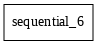


#################################################################################
###########     T R A I N I N G    K E R A S   M O D E L   H E R E      #########
#################################################################################
    
Building and training an automatic model using storm Tuner...
    Class weights: {0: 1.0, 1: 1.843679880329095}
    original datasize = 4931, initial batchsize = 48
    Early stopping : True
    recommended steps per epoch = 51
    default initializer = lecun_normal, default activation = selu
    Onecycle steps = 5200
    number of classes = 2, output_activation = sigmoid
    loss function: SparseCategoricalCrossentropy
    steps_per_epoch = 51, number epochs = 100
    val mode = max, val monitor = val_balanced_sparse_categorical_accuracy, patience = 10
Tensorboard log directory can be found at: deep_autoviml/mylogs
    chosen keras LR scheduler = default

Splitting train into 80+20 percent: train and validation data
    Splitting validat

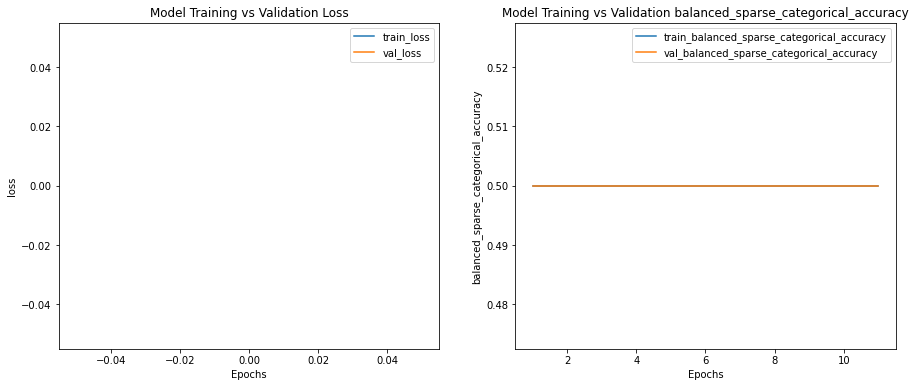

Time taken to train model (in mins) = 4
    Stopped epoch = 1
Held out data actuals shape: (528,)

Held out predictions shape:(528,)

###########################################################
         Held-out test data set Results:
Single Label, Multi Class Model Metrics Report: Churn
#################################################################


    Accuracy          = 71.2%
    Balanced Accuracy = 50.0%
    Precision         = 0.0%
    Average Precision = 35.6%
    Recall            = 0.0%
    F1 Score          = 0.0%
    ROC AUC           = 50.0%
#####################################################

Finally, training on full train dataset. This will take time...
    best learning rate = 0.00091655727
    set learning rate using best model: 0.00091655727
    max epochs for training = 1

Model not being saved since save_model_flag set to False...
6592

Saving vocab dictionary using pickle in Churn/auto/model_2021_11_01-22_29_40/artifacts/cat_vocab_dict.pickle...will take time...
    Saved pickle file in Churn/auto/model_2021_11_01-22_29_40/artifacts/cat_vocab_dict.pickle

Saving variable definitions file using pickle in Churn/auto/model_2021_11_01-22_29_40/artifacts/var_df.pickle...will take time...
    Saved pickle file in Churn/auto/model_2021_11_01-22_29_40/artifacts/var_df.pickle

Deep_Auto_ViML completed. Total time take

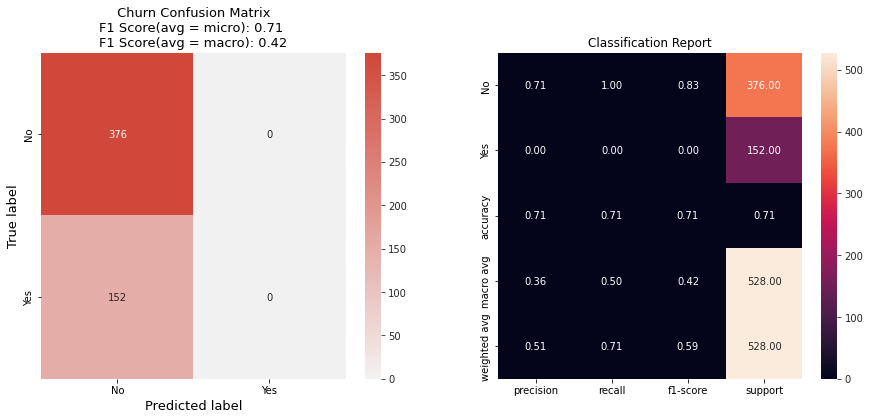

In [ ]:
model, cat_vocab_dict = deepauto.fit('/content/churn_train.csv', target, keras_model_type=keras_model_type,
		project_name=project_name, keras_options=keras_options, model_options=model_options, 
		save_model_flag=False, use_my_model='', verbose=0)

In [ ]:
testpath = '/content/churn_test.csv'
predictions = deepauto.predict(model, project_name=project_name, test_dataset=testpath,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=cat_vocab_dict)


Loading deep_autoviml model from <tensorflow.python.keras.engine.functional.Functional object at 0x7f07cb78fcd0> folder. This will take time...

Using <tensorflow.python.keras.engine.functional.Functional object at 0x7f07cb78fcd0> model provided as input...
Time taken to load saved model = 0 seconds
Loaded test data size: 2113
Alert! Modified column names to satisfy rules for column names in Tensorflow...
Alert! churn_reason has 2 mixed data types: Index([<class 'float'>, <class 'str'>], dtype='object') 
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    51 Predictors classified...
    possible latitude columns in dataset: ['lat_long', 'latitude']
        after further analysis, selected latitude columns = ['lat_long']
    possible longitude columns in dataset: ['longitude', 'avg_monthly_long_distance_charges', 'lat_long', 'total_long_distance_charges']
        after further analysis, no longitude columns found
      

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, mean_squared_error, balanced_accuracy_score
print(classification_report(test[target].values,predictions[1]))

              precision    recall  f1-score   support

          No       0.75      1.00      0.86      1581
         Yes       0.00      0.00      0.00       532

    accuracy                           0.75      2113
   macro avg       0.37      0.50      0.43      2113
weighted avg       0.56      0.75      0.64      2113



In [ ]:
print('Balanced Accuracy = %0.1f%%' %(100*balanced_accuracy_score(test[target].values, predictions[1])))

Balanced Accuracy = 50.0%
